# Yahia Kamel Hussein

## What are the countries that have contributed the most and the least to climate change relief?

Based on the carbon dioxide emissions, forest coverage, and land for different countries over the past years. I will analyze which countries have contributed the most and least to aid the climate change crisis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
#Understanding my variables
import seaborn as sns

df1 = pd.read_csv('Carbon Dioxide Emission Estimates.csv')
df2 = pd.read_csv('Threatened Species.csv')
df3 = pd.read_csv('Land.csv')
df4 = pd.read_csv('Water and Sanitation Services.csv')

#print(df1)
#print(df2)
#print(df3)
#print(df4)

In [ ]:
#Understanding my Carbon Dioxide Dataset

print("Carbon Dioxide Emissions dataset shape: ",df1.shape)
print("Head: ", df1.head())
print("Columns: ", df1.columns)

df1.nunique(axis=0)
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

#preview dataset
df1.info()

Carbon Dioxide Emissions dataset shape:  (2132, 4)
Head:    Countries  Year                                             Series  \
0   Albania  1975  Emissions (thousand metric tons of carbon diox...   
1   Albania  1985  Emissions (thousand metric tons of carbon diox...   
2   Albania  1995  Emissions (thousand metric tons of carbon diox...   
3   Albania  2005  Emissions (thousand metric tons of carbon diox...   
4   Albania  2010  Emissions (thousand metric tons of carbon diox...   

   Emissions  
0   4338.334  
1   6929.926  
2   1848.549  
3   3825.184  
4   3930.295  
Columns:  Index(['Countries', 'Year', 'Series', 'Emissions'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Countries  2132 non-null   object 
 1   Year       2132 non-null   int64  
 2   Series     2132 non-null   object 
 3   Emissions  2132 non-null   flo

In [ ]:
#Understanding my Threatened Species Dataset
print("Threatened Species dataset shape: ",df2.shape)
print("Head: ", df2.head())
print("Columns: ", df2.columns)

df2.nunique(axis=0)
df2.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

#preview dataset
df2.info()

Threatened Species dataset shape:  (6918, 4)
Head:       Countries  Year                                    Series  \
0  Afghanistan  2004  Threatened Species: Vertebrates (number)   
1  Afghanistan  2010  Threatened Species: Vertebrates (number)   
2  Afghanistan  2016  Threatened Species: Vertebrates (number)   
3  Afghanistan  2017  Threatened Species: Vertebrates (number)   
4  Afghanistan  2018  Threatened Species: Vertebrates (number)   

   Number of Species  
0                 31  
1                 31  
2                 35  
3                 35  
4                 34  
Columns:  Index(['Countries', 'Year', 'Series', 'Number of Species'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Countries          6918 non-null   object
 1   Year               6918 non-null   int64 
 2   Series             6918 non-

In [ ]:
#Understanding my Land Dataset

print("Land dataset shape: ",df3.shape)
print("Head: ", df3.head())
print("Columns: ", df3.columns)

df3.nunique(axis=0)
df3.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

#preview dataset
df3.info()

Land dataset shape:  (6159, 4)
Head:                              Land  Year                               Series  \
0  Total, all countries or areas  2005        Land area (thousand hectares)   
1  Total, all countries or areas  2005      Arable land (thousand hectares)   
2  Total, all countries or areas  2005  Permanent crops (thousand hectares)   
3  Total, all countries or areas  2005     Forest cover (thousand hectares)   
4  Total, all countries or areas  2005   Arable land (% of total land area)   

          Value  
0  1.299769e+07  
1  1.356869e+06  
2  1.456805e+05  
3  4.032743e+06  
4  1.043930e+01  
Columns:  Index(['Land', 'Year', 'Series', 'Value'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Land    6159 non-null   object 
 1   Year    6159 non-null   int64  
 2   Series  6159 non-null   object 
 3   Value   6159 n

In [ ]:
#Understanding my Water and Sanitation Services Dataset

print("Water and Sanitation Services dataset shape: ",df4.shape)
print("Head: ", df4.head())
print("Columns: ", df4.columns)

df4.nunique(axis=0)
df4.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

#preview dataset
df4.info()

Water and Sanitation Services dataset shape:  (1522, 4)
Head:    Water supply and sanitation services  Year  \
0        Total, all countries or areas  2005   
1        Total, all countries or areas  2005   
2        Total, all countries or areas  2005   
3        Total, all countries or areas  2005   
4        Total, all countries or areas  2005   

                                              Series    Value  
0  Safely managed drinking water sources, urban (...  86.1804  
1  Safely managed drinking water sources, rural (...  43.0323  
2  Safely managed drinking water sources, total (...  64.2425  
3  Safely managed sanitation facilities, urban (P...  37.0176  
4  Safely managed sanitation facilities, rural (P...  26.0720  
Columns:  Index(['Water supply and sanitation services', 'Year', 'Series', 'Value'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 4 columns):
 #   Column                                Non-Null Count

In [ ]:
#Cleaning datasets for the years column to be between 2005 and 2017 and remove the outliers

df1_cleaned = df1[(df1['Year'] >= 2010) & (df1['Year'] <= 2017)]
df2_cleaned = df2[(df2['Year'] >= 2010) & (df2['Year'] <= 2017)]
df3_cleaned = df3[(df3['Year'] >= 2010) & (df3['Year'] <= 2017)]
df4_cleaned = df4[(df4['Year'] >= 2010) & (df4['Year'] <= 2017)]

print(df1_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))
print(df2_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))
print(df3_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))
print(df4_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))


              Year           Value
count  1132.000000     1132.000000
mean   2014.515901   107810.194688
std       2.685178   626120.089145
min    2010.000000        0.025000
25%    2015.000000        3.543250
50%    2016.000000      252.739000
75%    2017.000000    29682.650000
max    2017.000000  9257933.900000
              Year        Value
count  2976.000000  2976.000000
mean   2014.350806    86.352823
std       3.085654   175.320911
min    2010.000000     0.000000
25%    2010.000000    10.000000
50%    2016.000000    36.000000
75%    2017.000000    86.000000
max    2017.000000  2358.000000
              Year            Value
count  3954.000000      3954.000000
mean   2013.494689     41476.545122
std       3.500439    367642.056685
min    2010.000000         0.000000
25%    2010.000000         7.580425
50%    2010.000000        40.166700
75%    2017.000000      1391.397750
max    2017.000000  13002855.208000
              Year        Value
count  1022.000000  1022.000000
mean   20

In [ ]:
#Dropping rows with null values

df1_cleaned = df1_cleaned.dropna(axis=0)
print("New Shape for Carbon Dioxide Emissions dataset: ", df1_cleaned.shape)

df2_cleaned = df2_cleaned.dropna(axis=0)
print("New Shape for Threatened Species dataset: ", df2_cleaned.shape)

df3_cleaned = df3_cleaned.dropna(axis=0)
print("New Shape for Land dataset: ", df3_cleaned.shape)

df4_cleaned = df4_cleaned.dropna(axis=0)
print("New Shape for Water and Sanitation Services dataset: ", df4_cleaned.shape)

New Shape for Carbon Dioxide Emissions dataset:  (1132, 4)
New Shape for Threatened Species dataset:  (2976, 4)
New Shape for Land dataset:  (3954, 4)
New Shape for Water and Sanitation Services dataset:  (1022, 4)


<AxesSubplot:xlabel='Year', ylabel='Value'>

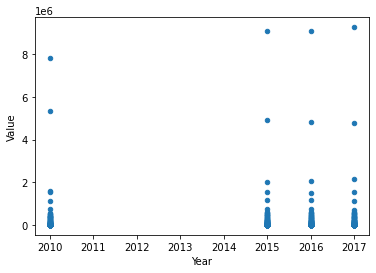

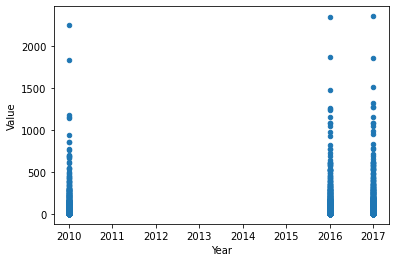

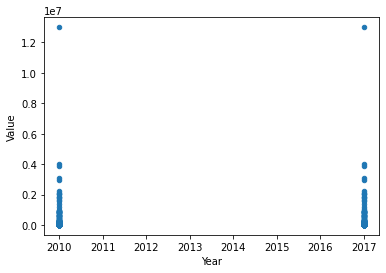

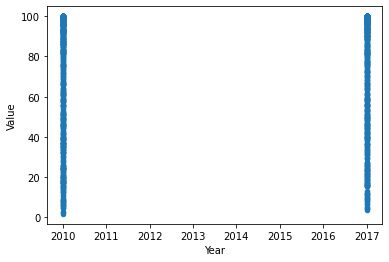

In [ ]:
#Scatter plots for each dataset

df1_cleaned.plot(kind='scatter', x='Year', y='Value')
df2_cleaned.plot(kind='scatter', x='Year', y='Value')
df3_cleaned.plot(kind='scatter', x='Year', y='Value')
df4_cleaned.plot(kind='scatter', x='Year', y='Value')

In [ ]:
#merging datasets 1 and 2 + renaming columns

df1.rename(columns = {'Value' : 'Emissions'}, inplace = True)
df2.rename(columns = {'Value' : 'Number of Species'}, inplace = True)
df1.rename(columns = {'CO2 emission estimates' : 'Countries'}, inplace = True)
df2.rename(columns = {'Threatened species' : 'Countries'}, inplace = True)



carbon_threatened = pd.merge(df1, df2, how = "outer")
carbon_threatened
#Merge dataframes and keep only overlapping rows

overlapping_carbon_threatened = df1.merge(df2, left_on = 'Emissions', right_on = 'Number of Species', how = 'inner')
